In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('./data/제10회 산업통상자원부 공공데이터활용 BI공모전_빅데이터 분석 과제 1_데이터.xlsx',sheet_name=1)

In [3]:
df

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


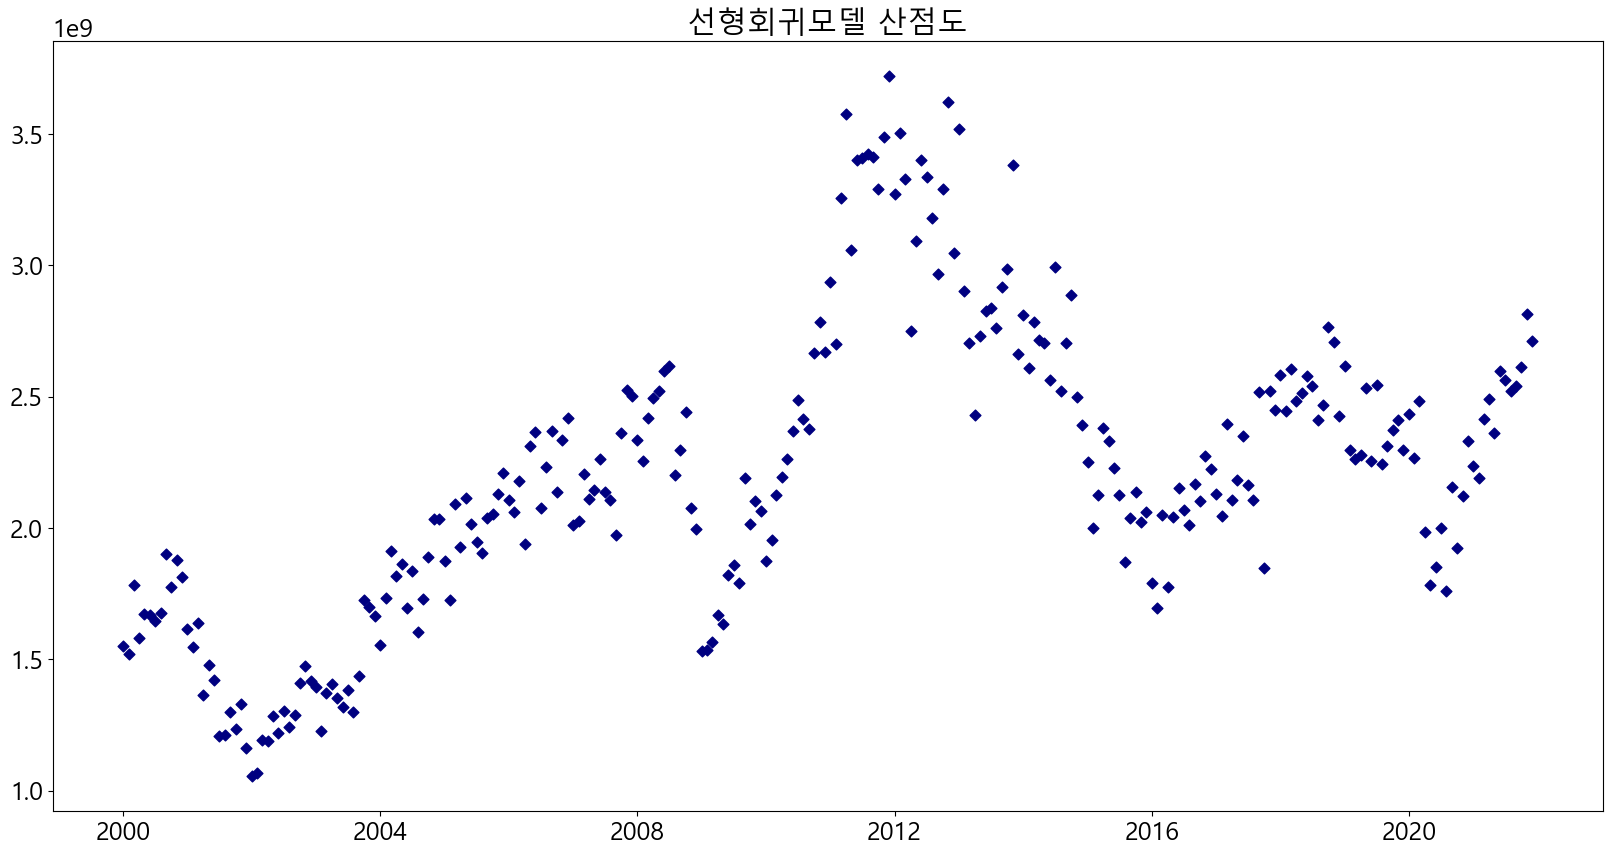

In [14]:
# 추세선을 이용한 예측데이터 예측 가능여부 확인하기
    # - 예측데이터로 사용할 수 있는지 확인
    # - 산점도를 이용한 확인
    # - 훈련데이터, 예측데이터 산점도로 그리기
    
# 선형 회귀 모델 산점도
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('선형회귀모델 산점도')

plt.scatter(df['기간'], df['한국의대일본수출'], marker='D',s=30, c='navy')
# plt.scatter(nfish, lr.predict(nfish), marker='*', s=300, c='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선
# plt.plot([15,50],[lr.coef_ * 15 + lr.intercept_,
#                   lr.coef_ * 50 + lr.intercept_], color = 'darkorange')

plt.rcParams['lines.linewidth'] = 2

plt.show()

In [19]:
product = pd.read_excel('./data/품목별_수출입실적(00-04).xlsx',header=4)

In [23]:
product = product.iloc[1:]

In [33]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 1 to 4704
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      4704 non-null   object 
 1   품목명     4704 non-null   object 
 2   품목코드    4704 non-null   float64
 3   수출중량    4704 non-null   object 
 4   수입중량    4704 non-null   object 
 5   수출금액    4704 non-null   object 
 6   수입금액    4704 non-null   object 
 7   무역수지    4704 non-null   object 
dtypes: float64(1), object(7)
memory usage: 294.1+ KB


In [47]:
product

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
1,2000.01,살아 있는 동물,1.0,2.0,70.7,93,743,-650
2,2000.01,육과 식용 설육(屑肉),2.0,"7,814.5","37,348.3","26,679","84,296","-57,617"
3,2000.01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,"31,743.9","62,955.3","91,931","121,804","-29,873"
4,2000.01,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,380.7,"8,558.3",577,"11,497","-10,920"
5,2000.01,다른 류로 분류되지 않은 동물성 생산품,5.0,570.9,"2,617.9",620,"10,795","-10,175"
...,...,...,...,...,...,...,...,...
4700,2004.01,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,170.7,142.7,"1,564","37,596","-36,032"
4701,2004.01,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,"6,792.5","18,929.1","24,647","60,079","-35,432"
4702,2004.01,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,"2,308.9","6,732.5","27,503","55,074","-27,571"
4703,2004.01,잡품,96.0,"2,950.9","2,097.1","33,932","17,789","16,143"


In [52]:
product['수출금액'] = product['수출금액'].str.replace(',','')

C:\Users\admin\AppData\Local\Temp\ipykernel_4604\1411116205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['수출금액'] = product['수출금액'].str.replace(',','')


In [55]:
product['수출금액'] = product['수출금액'].astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_4604\1452473471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['수출금액'] = product['수출금액'].astype(int)


In [82]:
top_5 = product[product['기간'] == '2000.01'].sort_values('수출금액',ascending=False).head(5)['품목코드']
top_5

84    85.0
83    84.0
86    87.0
27    27.0
39    39.0
Name: 품목코드, dtype: float64

In [89]:
top_5.iloc[0]

85.0

In [90]:
product_top1 = product[product['품목코드'] == top_5.iloc[0]]
product_top2 = product[product['품목코드'] == top_5.iloc[1]]
product_top3 = product[product['품목코드'] == top_5.iloc[2]]
product_top4 = product[product['품목코드'] == top_5.iloc[3]]
product_top5 = product[product['품목코드'] == top_5.iloc[4]]

In [84]:
product_top5 = product[product['품목코드'].isin(top_5)]
product_top5

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
27,2000.01,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",27.0,"3,388,522.2","21,536,660.0",682997,"3,404,028","-2,721,031"
39,2000.01,플라스틱과 그 제품,39.0,"606,765.1","60,379.0",561055,"201,070","359,985"
83,2000.01,원자로ㆍ보일러ㆍ기계류와 이들의 부분품,84.0,"174,096.2","61,892.3",2214858,"1,548,291","666,567"
84,2000.01,"전기기기와 그 부분품, 녹음기ㆍ음성 재생기ㆍ텔레비전의 영상과 음성의 기록기ㆍ재생기와...",85.0,"163,258.3","49,619.0",3429518,"2,601,772","827,746"
86,2000.01,철도용이나 궤도용 외의 차량과 그 부분품ㆍ부속품,87.0,"177,671.1","11,226.7",958298,"125,100","833,198"
...,...,...,...,...,...,...,...,...
4635,2004.01,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",27.0,"2,388,968.2","20,536,051.5",656733,"3,550,115","-2,893,382"
4647,2004.01,플라스틱과 그 제품,39.0,"725,737.7","80,633.9",804694,"309,652","495,042"
4691,2004.01,원자로ㆍ보일러ㆍ기계류와 이들의 부분품,84.0,"252,153.3","89,090.4",2996223,"1,750,213","1,246,010"
4692,2004.01,"전기기기와 그 부분품, 녹음기ㆍ음성 재생기ㆍ텔레비전의 영상과 음성의 기록기ㆍ재생기와...",85.0,"188,204.5","62,569.9",5175514,"3,381,586","1,793,928"


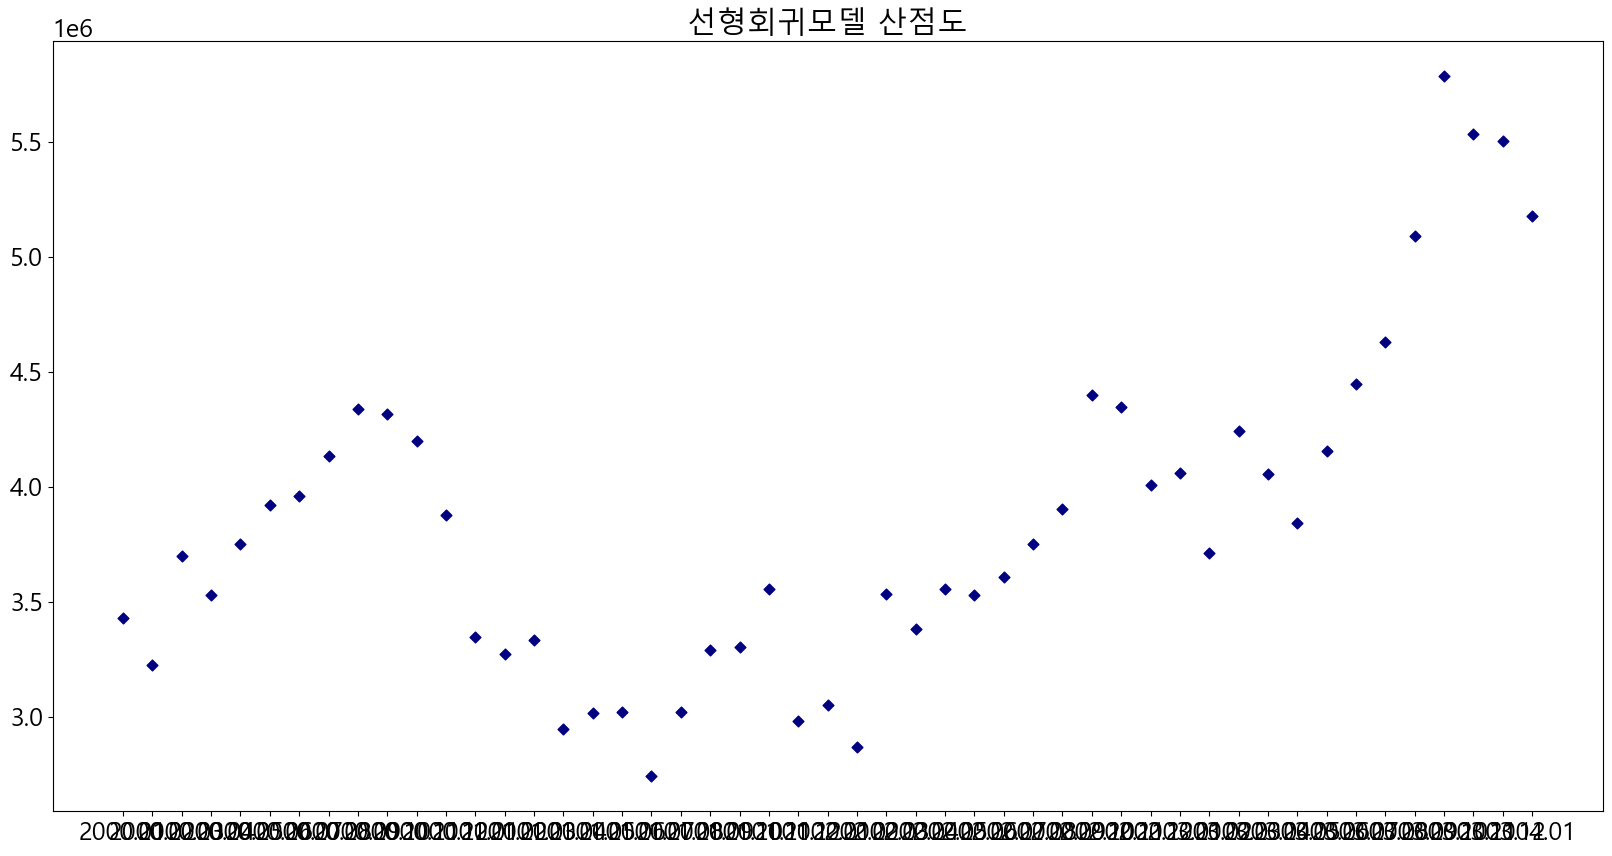

In [91]:
# 추세선을 이용한 예측데이터 예측 가능여부 확인하기
    # - 예측데이터로 사용할 수 있는지 확인
    # - 산점도를 이용한 확인
    # - 훈련데이터, 예측데이터 산점도로 그리기
    
# 선형 회귀 모델 산점도
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('선형회귀모델 산점도')

plt.scatter(product_top1['기간'], product_top1['수출금액'], marker='D',s=30, c='navy')
# plt.scatter(nfish, lr.predict(nfish), marker='*', s=300, c='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선
# plt.plot([15,50],[lr.coef_ * 15 + lr.intercept_,
#                   lr.coef_ * 50 + lr.intercept_], color = 'darkorange')

plt.rcParams['lines.linewidth'] = 2

plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기간         264 non-null    datetime64[ns]
 1   한국 수출금액    264 non-null    int64         
 2   한국의대중국수출   264 non-null    int64         
 3   한국의대미국수출   264 non-null    int64         
 4   한국의대베트남수출  264 non-null    int64         
 5   한국의대홍콩수출   264 non-null    int64         
 6   한국의대일본수출   264 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 14.6 KB


In [96]:
df['기간'] = df['기간'].astype(str)

In [115]:
len(product_top1)

49

In [116]:
df_00_04 = df.loc[:48]

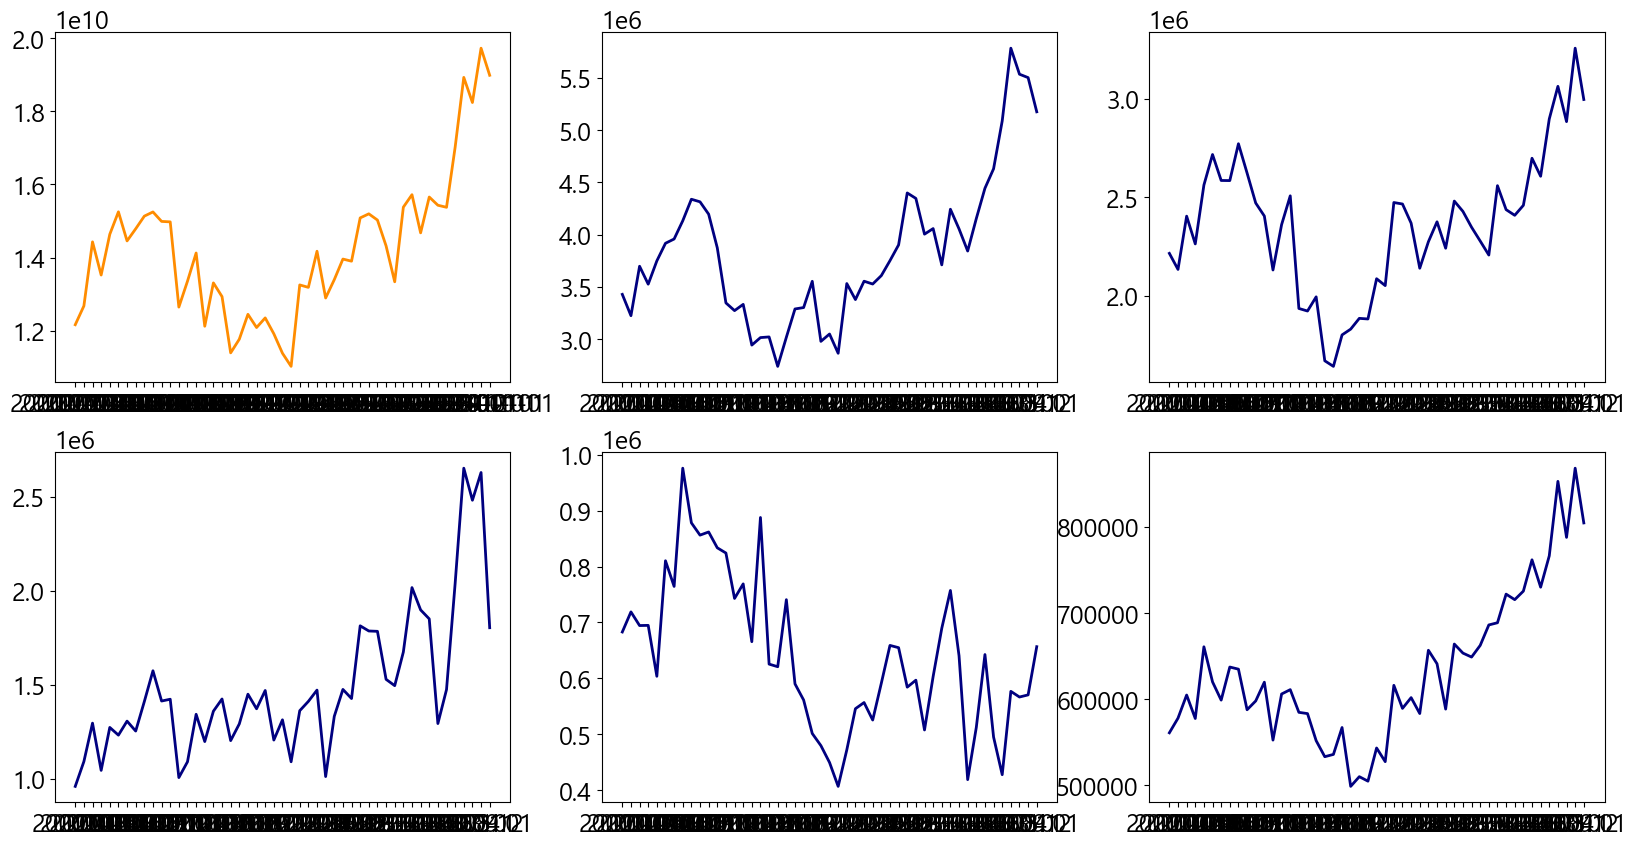

In [180]:
# 추세선을 이용한 예측데이터 예측 가능여부 확인하기
    # - 예측데이터로 사용할 수 있는지 확인
    # - 산점도를 이용한 확인
    # - 훈련데이터, 예측데이터 산점도로 그리기
    
# 선형 회귀 모델 산점도
fig, axs = plt.subplots(2, 3, figsize = (20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

axs[0,0].plot(df_00_04['기간'], df_00_04['한국 수출금액'], c='darkorange')
axs[0,1].plot(product_top1['기간'], product_top1['수출금액'], c='navy')
axs[0,2].plot(product_top2['기간'], product_top2['수출금액'], c='navy')
axs[1,0].plot(product_top3['기간'], product_top3['수출금액'], c='navy')
axs[1,1].plot(product_top4['기간'], product_top4['수출금액'], c='navy')
axs[1,2].plot(product_top5['기간'], product_top5['수출금액'], c='navy')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선
# plt.plot([15,50],[lr.coef_ * 15 + lr.intercept_,
#                   lr.coef_ * 50 + lr.intercept_], color = 'darkorange')

plt.rcParams['lines.linewidth'] = 2

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [199]:
product_2000 = product[product['기간'] == '2000.01']

In [206]:
product_2000

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지,총수출금액
1,2000.01,살아 있는 동물,1.0,2.0,70.7,93,743,-650,-722477256
2,2000.01,육과 식용 설육(屑肉),2.0,"7,814.5","37,348.3",26679,"84,296","-57,617",-722477256
3,2000.01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,"31,743.9","62,955.3",91931,"121,804","-29,873",-722477256
4,2000.01,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,380.7,"8,558.3",577,"11,497","-10,920",-722477256
5,2000.01,다른 류로 분류되지 않은 동물성 생산품,5.0,570.9,"2,617.9",620,"10,795","-10,175",-722477256
...,...,...,...,...,...,...,...,...,...
92,2000.01,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,163.2,59.7,1234,"26,464","-25,230",-722477256
93,2000.01,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,"5,782.6","6,516.1",19826,"22,291","-2,465",-722477256
94,2000.01,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,"3,558.7","4,267.1",46469,"30,364","16,105",-722477256
95,2000.01,잡품,96.0,"3,716.2","1,596.0",46157,"14,070","32,087",-722477256


In [207]:
product

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지,총수출금액
1,2000.01,살아 있는 동물,1.0,2.0,70.7,93,743,-650,1.267604e+10
2,2000.01,육과 식용 설육(屑肉),2.0,"7,814.5","37,348.3",26679,"84,296","-57,617",1.442970e+10
3,2000.01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,"31,743.9","62,955.3",91931,"121,804","-29,873",1.352204e+10
4,2000.01,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,380.7,"8,558.3",577,"11,497","-10,920",1.463675e+10
5,2000.01,다른 류로 분류되지 않은 동물성 생산품,5.0,570.9,"2,617.9",620,"10,795","-10,175",1.525094e+10
...,...,...,...,...,...,...,...,...,...
4700,2004.01,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,170.7,142.7,1564,"37,596","-36,032",NaN
4701,2004.01,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,"6,792.5","18,929.1",24647,"60,079","-35,432",NaN
4702,2004.01,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,"2,308.9","6,732.5",27503,"55,074","-27,571",NaN
4703,2004.01,잡품,96.0,"2,950.9","2,097.1",33932,"17,789","16,143",NaN


In [194]:
product_1

품목코드,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0
